In [11]:
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image

rcParams['font.family'] = 'Arial'


col = ['#5052c7', '#1c84b3', '#0fb390', '#f09816', '#fb3856', '#41429f', '#166a8f', '#0b9072', '#c07a12', '#c92d45']

In [28]:
df = pd.read_csv('Tennessee 500 Cities.csv')
df.head()

,CITYNAME,UNIQUEID,COPD,CHD,Diabetes,High Blood Pressure,High Cholesterol,Cholesterol Screening,Lack of Health Insurance,Taking Medicine for High Blood Pressure,Doctor Visits,Binge Drinking,Smoking,No Leisure Time,Obesity,Sleeping less than 7 hours
0,Chattanooga,4714000,17.9,14.3,25.4,79.1,70.9,153.0,32.9,147.0,144.7,25.9,47.4,58.6,68.1,80.0
1,Chattanooga,4714000-47065000400,13.7,10.5,23.7,57.6,43.3,72.9,26.3,84.3,78.9,8.0,32.6,46.3,48.0,50.0
2,Chattanooga,4714000-47065000600,5.6,5.3,7.4,29.8,33.2,81.6,8.4,76.9,69.6,16.6,15.7,17.7,25.3,32.8
3,Chattanooga,4714000-47065000700,5.0,4.2,6.2,25.6,29.9,78.2,8.6,73.4,68.0,17.6,15.7,16.8,24.3,32.8
4,Chattanooga,4714000-47065000800,7.4,5.4,10.2,33.2,33.0,74.3,14.9,75.4,68.7,15.3,24.1,25.9,32.3,39.4


In [13]:
df

,CITYNAME,UNIQUEID,COPD,CHD,Diabetes,High Blood Pressure,High Cholesterol,Cholesterol Screening,Lack of Health Insurance,Taking Medicine for High Blood Pressure,Doctor Visits,Binge Drinking,Smoking,No Leisure Time,Obesity,Sleeping less than 7 hours
0,Chattanooga,4714000,17.9,14.3,25.4,79.1,70.9,153.0,32.9,147.0,144.7,25.9,47.4,58.6,68.1,80.0
1,Chattanooga,4714000-47065000400,13.7,10.5,23.7,57.6,43.3,72.9,26.3,84.3,78.9,8.0,32.6,46.3,48.0,50.0
2,Chattanooga,4714000-47065000600,5.6,5.3,7.4,29.8,33.2,81.6,8.4,76.9,69.6,16.6,15.7,17.7,25.3,32.8
3,Chattanooga,4714000-47065000700,5.0,4.2,6.2,25.6,29.9,78.2,8.6,73.4,68.0,17.6,15.7,16.8,24.3,32.8
4,Chattanooga,4714000-47065000800,7.4,5.4,10.2,33.2,33.0,74.3,14.9,75.4,68.7,15.3,24.1,25.9,32.3,39.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,Nashville,4752006-47037019200,7.2,5.2,9.8,32.4,34.5,74.9,14.6,74.7,67.6,16.6,24.0,26.1,33.3,40.7
539,Nashville,4752006-47037019300,14.7,8.4,18.0,44.5,39.8,59.3,30.7,74.9,69.9,9.6,40.2,48.1,48.7,51.2
540,Nashville,4752006-47037019400,6.0,5.0,10.8,36.3,34.4,74.8,13.7,77.2,70.6,15.7,20.2,24.4,33.9,41.0
541,Nashville,4752006-47037019500,5.1,4.0,7.6,27.5,30.5,71.1,13.6,68.4,64.2,20.6,21.4,21.0,30.5,39.7


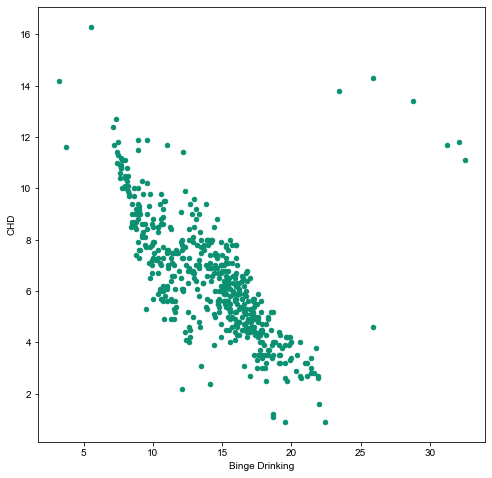

In [14]:
df.plot(kind='scatter', y='CHD', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

In [15]:
Q1_CHD = df['CHD'].quantile(0.25)
Q3_CHD = df['CHD'].quantile(0.75)
IQR_CHD = Q3_CHD - Q1_CHD
Q1_Binge_Drinking = df['Binge Drinking'].quantile(0.25)
Q3_Binge_Drinking = df['Binge Drinking'].quantile(0.75)
IQR_Binge_Drinking = Q3_Binge_Drinking - Q1_Binge_Drinking
new_df = df[(df['CHD'] > Q1_CHD-1.5*IQR_CHD) & 
            (df['CHD'] < Q3_CHD+1.5*IQR_CHD)]
new_df = new_df[(new_df['Binge Drinking']>Q1_Binge_Drinking-1.5*IQR_Binge_Drinking) & 
                (new_df['Binge Drinking']<Q3_Binge_Drinking+1.5*IQR_Binge_Drinking)]
new_df

,CITYNAME,UNIQUEID,COPD,CHD,Diabetes,High Blood Pressure,High Cholesterol,Cholesterol Screening,Lack of Health Insurance,Taking Medicine for High Blood Pressure,Doctor Visits,Binge Drinking,Smoking,No Leisure Time,Obesity,Sleeping less than 7 hours
1,Chattanooga,4714000-47065000400,13.7,10.5,23.7,57.6,43.3,72.9,26.3,84.3,78.9,8.0,32.6,46.3,48.0,50.0
2,Chattanooga,4714000-47065000600,5.6,5.3,7.4,29.8,33.2,81.6,8.4,76.9,69.6,16.6,15.7,17.7,25.3,32.8
3,Chattanooga,4714000-47065000700,5.0,4.2,6.2,25.6,29.9,78.2,8.6,73.4,68.0,17.6,15.7,16.8,24.3,32.8
4,Chattanooga,4714000-47065000800,7.4,5.4,10.2,33.2,33.0,74.3,14.9,75.4,68.7,15.3,24.1,25.9,32.3,39.4
5,Chattanooga,4714000-47065001100,9.4,7.5,16.3,45.7,38.7,70.6,20.1,80.4,73.4,11.7,25.8,34.1,40.1,44.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,Nashville,4752006-47037019200,7.2,5.2,9.8,32.4,34.5,74.9,14.6,74.7,67.6,16.6,24.0,26.1,33.3,40.7
539,Nashville,4752006-47037019300,14.7,8.4,18.0,44.5,39.8,59.3,30.7,74.9,69.9,9.6,40.2,48.1,48.7,51.2
540,Nashville,4752006-47037019400,6.0,5.0,10.8,36.3,34.4,74.8,13.7,77.2,70.6,15.7,20.2,24.4,33.9,41.0
541,Nashville,4752006-47037019500,5.1,4.0,7.6,27.5,30.5,71.1,13.6,68.4,64.2,20.6,21.4,21.0,30.5,39.7


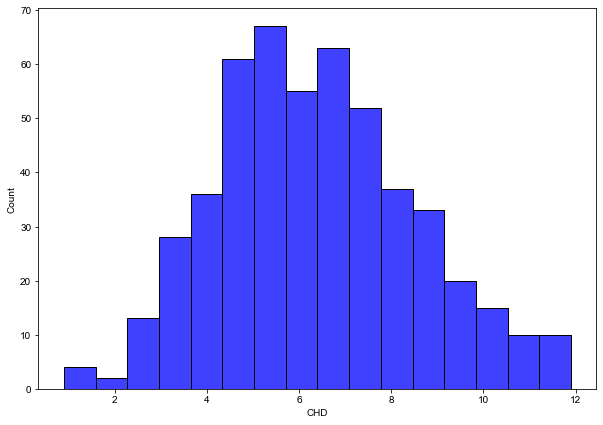

In [16]:
plt.figure(figsize=(10,7))
sns.histplot(new_df['CHD'], color='blue');

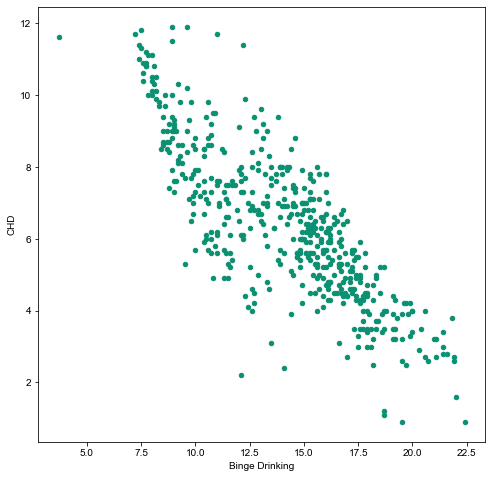

In [18]:
new_df.plot(kind='scatter', y='CHD', x='Binge Drinking', figsize=(8,8), color="#0b9072")
plt.show()

In [19]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Binge Drinking'], df['CHD'])

In [22]:
regressors = ['Binge Drinking']

model = sm.OLS(new_df['CHD'], sm.add_constant(new_df[regressors])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CHD   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1019.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          3.82e-123
Time:                        11:48:44   Log-Likelihood:                -819.81
No. Observations:                 506   AIC:                             1644.
Df Residuals:                     504   BIC:                             1652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.3560      0.225     59.292      0.000      12.913      13.799
Binge Drinking    -0.4947      0.015    -31.928      0.000      -0.525      -0.464
==============================================================================
Omnibus:                       20.246   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.721
Skew:                          -0.341   Prob(JB):                     5.80e-07
Kurtosis:                       3.947   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

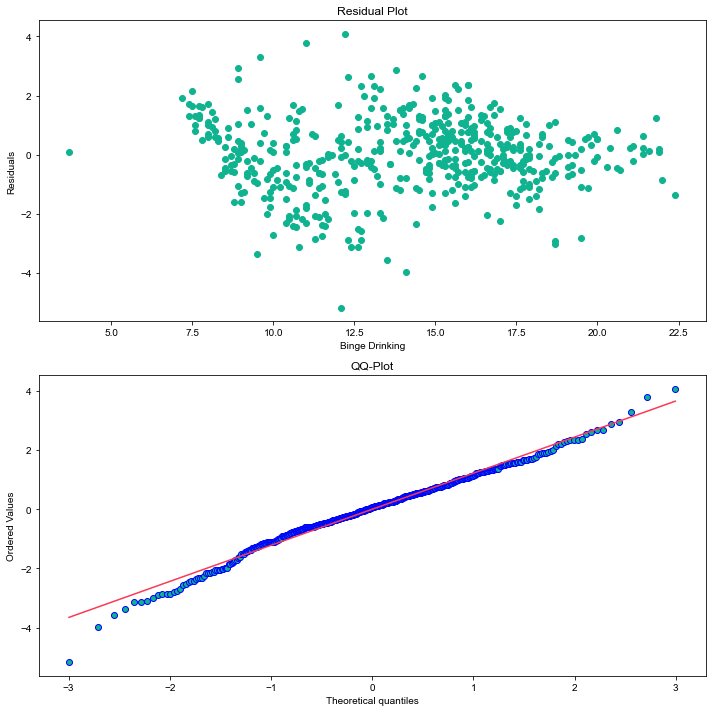

In [27]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
residuals = new_df['CHD'].values - model.predict() #Calculate residuals

# Make residual plot - homoskedasticity
ax[0].scatter(x = new_df['Binge Drinking'], y= residuals, color = col[2])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Binge Drinking')
ax[0].set_ylabel('Residuals')

# Make QQ Plot - test for normality of error terms
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()